## Correlation Matrix | Asteroid Impact Probability

We want to see how the different fields in this NEOs orbital data interact with eachother

#### Import Libraries & Setup Engines

In [2]:
from datetime import datetime as dt 
import numpy as np
import pandas as pd
import sqlalchemy as sql
import matplotlib.pyplot as plt
import seaborn as sns

sql_engine = sql.create_engine('mssql+pyodbc://@localhost')

#### Read SQL table
This is the NASA Sentry system data from the **histograms** notebook

In [3]:
table = 'ASTEROID_IMPACT'

query = f"SELECT * FROM {table}"
df = pd.read_sql_query(query, sql_engine, index_col='Object Name')
df.head()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
Object Name,,,,,,,,,,
2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


### Produce a Correlation Matrix

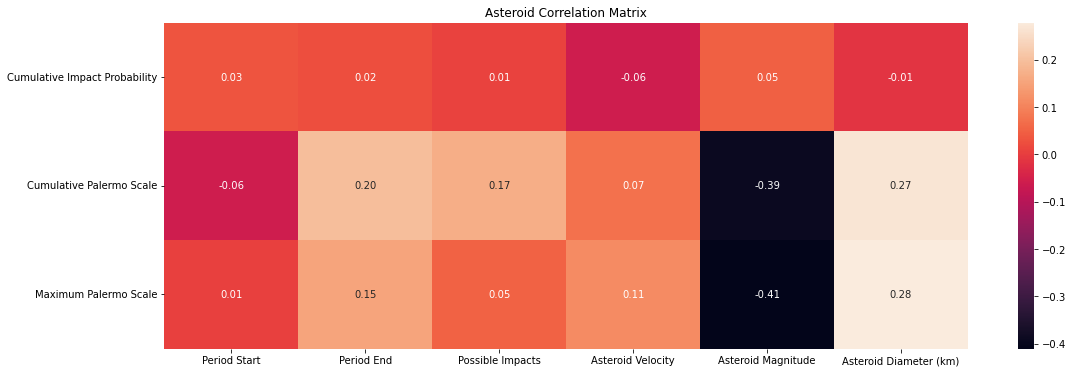

In [29]:
cm = df.corr().loc[['Cumulative Impact Probability', 'Cumulative Palermo Scale', 'Maximum Palermo Scale'],
                   ['Period Start', 'Period End', 'Possible Impacts', 'Asteroid Velocity', 'Asteroid Magnitude', 'Asteroid Diameter (km)']]

plt.figure(figsize=(18,6))
plt.title('Asteroid Correlation Matrix') 
sns.heatmap(cm, annot=True, fmt='.2f')
plt.show()

#### Findings
- The Cumulative Palermo Scale, a measurement of impact danger, appears to be better correlated with our potential features than Cumulative Impact Probability
- The longer an object is in period around Earth, the higher the danger
- Velocity is weakly correlated with danger due to an impact, but weakly negatively correlated with impact probability
- Counter-intuitively, danger is negatively correlated with magnitude, but positively correlated with Diameter.  We will want to see how those are related to eachother below

It will be interesting to investigate these points further in the **scatter_plots** notebook

***

#### Appendix

Let's take a look at the full Correlation Matrix and see what's going on with diameter and magnitude

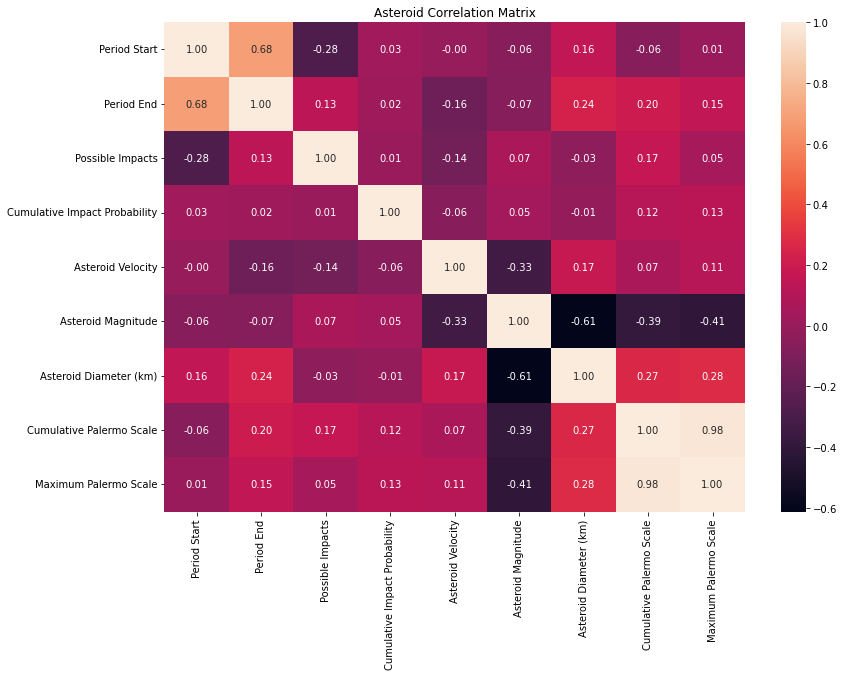

In [34]:
cm = df.corr()

plt.figure(figsize=(13,9))
plt.title('Asteroid Correlation Matrix') 
sns.heatmap(cm, annot=True, fmt='.2f')
plt.show()

This stands out as highly odd.  I would have expected magnitude (apparent size at a 1AU distance) to be positively correlated with diameter. Maybe we can uncover some answers with some **scatter_plots** 